# Boosting Yöntemleri

Temel mantık: Zayıf öğrencileri bir araya getirip güçlü bir öğrenci ortaya çıkarmaktır.

# Adaptive Boosting / AdaBoost

işte zayıf sınıflandırıcıların bir araya getrilerek güçlü bir sınıflandırıcı çıkartılması algoritmasıdır.

 

# GBM

Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.
Yani model kuruyor hatalar üzerine tekrar modle kuruluyor. 

Bu şekilde modeller serisi oluşuyor




* Seri içerisindeki bir model kendinden bir önceki modelin tahmin artıklarının/hatalarının üzerine kuruşarak oluşturulur



In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

# model

In [3]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
gbm=GradientBoostingRegressor().fit(X_train,y_train)

In [5]:
gbm

GradientBoostingRegressor(random_state=42)

# tahmin

In [6]:
np.sqrt(mean_squared_error(y_test,gbm.predict(X_test)))

355.0911760640623

# Tuning

In [19]:
params={"learning_rate":[0.001,0.01,0.1,0.2],
        "max_depth":[3,5,8,50,100],
        "n_estimators":[200,500,1000,2000],
        "subsample":[1,0.5,0.75],}

In [20]:
gbm=GradientBoostingRegressor()
gbm_cv=GridSearchCV(gbm, params, cv=10, n_jobs=-1, verbose=2)
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [31]:
gbm_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.5}

In [40]:
gbm_final=GradientBoostingRegressor(learning_rate=0.1,
                                    max_depth=3,
                                    n_estimators=200,
                                    subsample=0.5,
                                    random_state=40).fit(X_train,y_train)

In [41]:
np.sqrt(mean_squared_error(y_test,gbm_final.predict(X_test)))

305.1627445828413

In [42]:
importance=pd.DataFrame({"importance":gbm_final.feature_importances_*100},
                        index=X_train.columns)
                        

Text(0.5, 0, 'değişknelerin önem sirasi')

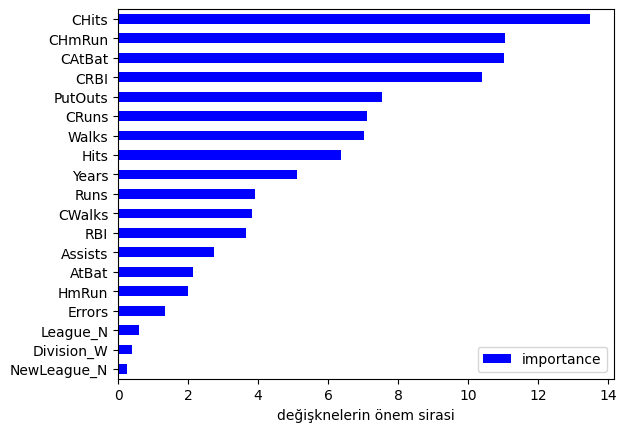

In [43]:
importance.sort_values(by="importance",
                        axis=0,
                        ascending=True).plot(kind="barh",color="blue")
plt.xlabel("değişknelerin önem sirasi")